# Importing Packages:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset:


In [20]:
data = pd.read_csv("D:\downloads\multi variate.csv")
data.head()


,area,bedroom,Age,price
0,2600,3.0,9,550000
1,3000,4.0,6,565000
2,3200,NaN,7,610000
3,3600,3.0,10,595000
4,4000,5.0,6,760000


# Preprocessing:

In [22]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
state_encoded=le.fit_transform(data['bedroom'])
data['bedroom'] = state_encoded
data.head()


,area,bedroom,Age,price
0,2600,0,9,550000
1,3000,1,6,565000
2,3200,4,7,610000
3,3600,0,10,595000
4,4000,2,6,760000



# Description Of Dataset:

In [23]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   area     6 non-null      int64
 1   bedroom  6 non-null      int64
 2   Age      6 non-null      int64
 3   price    6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes


In [24]:
data.describe()


,area,bedroom,Age,price
count,6.000000,6.000000,6.000000,6.000000
mean,3416.666667,1.666667,8.000000,648333.333333
std,587.934237,1.632993,1.897367,109117.673484
min,2600.000000,0.000000,6.000000,550000.000000
25%,3050.000000,0.250000,6.250000,572500.000000
50%,3400.000000,1.500000,8.000000,602500.000000
75%,3900.000000,2.750000,9.750000,722500.000000
max,4100.000000,4.000000,10.000000,810000.000000


# Independent Variable

In [25]:
X = data.iloc[:,:4]
X.head()


,area,bedroom,Age,price
0,2600,0,9,550000
1,3000,1,6,565000
2,3200,4,7,610000
3,3600,0,10,595000
4,4000,2,6,760000


# Dependent Variable:


In [26]:
Y = data.price
Y.head()


0    550000
1    565000
2    610000
3    595000
4    760000
Name: price, dtype: int64

# Splitting The Dataset Into Training Set And Testing Set:


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=355)
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

# Prediction:


In [28]:
y_predict = mlr.predict(x_test)
y_predict

array([549999.99988425, 760000.00007976])

# Visualization:

Text(0, 0.5, 'y_pred')

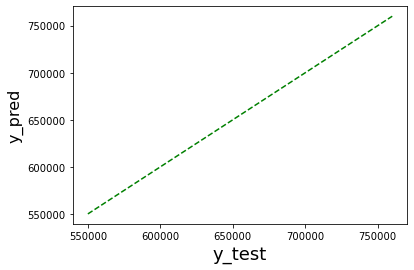

In [48]:

plt.plot(y_test,y_predict,'--',color='green')
plt.xlabel('y_test', fontsize=18) 
plt.ylabel('y_pred', fontsize=16)


# Performance Evaluation:


In [31]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 100.00
Mean Absolute Error: 9.775371290743351e-05
Mean Square Error: 9.879659223805282e-09
Root Mean Square Error: 9.939647490633298e-05


# Accuracy:


In [32]:
print(mlr.score(x_test, y_test))

1.0
